<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Séries Temporais
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Wrangling;</li>
  <li>Decomposição.</li>
</ol>

---

# **Exercícios**

## 1\. Correlação entre consumo de energia elétrica e temperatura

Neste exercício, vamos correlacionar a base de dados de consumo de energia elétrica vista em aula com uma base de dados de temperatura média das tres maiores cidades do sudeste: **São Paulo**, **Rio de Janeiro** e **Belo Horizonte**. Os dados de temperatura estão presente neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv) e foram extraídos diretamento do [site](https://portal.inmet.gov.br) do instituto nacional de meteorologias (INMTE), órgão do governo vinculado ao ministério de agricultura, pecuária e abastecimento.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

### **1.1. Energia**

Carregue os dados de **energia** com o código abaixo e responda as perguntas abaixo:

In [3]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [4]:
energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

<ipython-input-4-98fa4fa7de4e>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)


In [5]:
energia.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [6]:
energia.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


Responda:

 - Qual é a granularidade da base de dados: mês
 - Qual é o intervalo de tempo (min/max): mín: 01-01-2004 / máx: 01-12-2020

### **1.2. Temperatura**

Carregue os dados de **temperatura** com o código abaixo e responda as perguntas abaixo:

In [11]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv' -O 'temperatura.csv'

In [9]:
temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

<ipython-input-9-6a19c3c602dc>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)


In [12]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [13]:
temperatura.tail()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
896,2020-12-27,20,24.0,23.0
897,2020-12-28,21,25.0,23.0
898,2020-12-29,22,27.0,23.0
899,2020-12-30,24,27.0,23.0
900,2020-12-31,23,29.0,24.0


Responda:

 - Qual é a granularidade da base de dados: dia
 - Qual é o intervalo de tempo (min/max): mín: 15-07-2018 / máx: 31-12-2020

## 2\. Processamento

### **2.1. Energia**

Processe o dataframe `energia`:

 - **a.** Atributa ao index a coluna temporal.

In [14]:
# resposta da questão 2.1.a

energia = energia.set_index(keys=['referencia'])

In [15]:
energia.head()

,residencial,industrial,comercial
referencia,,,
2004-01-01,3694386,6977471,2450453
2004-02-01,3511541,7084623,2396965
2004-03-01,3629455,7087613,2402521
2004-04-01,3733863,7384540,2580914
2004-05-01,3537269,7258307,2344084


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [16]:
# resposta da questão 2.1.b

energia_filtrada = energia.loc['2019-01-01':'2020-12-31']

 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

In [17]:
energia_filtrada.shape

(24, 3)

### **2.2. Temperatura**

Processe o dataframe `temperatura`:

 - **a.** Atributa ao index a coluna temporal.

In [18]:
# resposta da questão 2.2.a

temperatura = temperatura.set_index(keys=['referencia'])

 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [19]:
# resposta da questão 2.1.b

temperatura_filtrada = temperatura.loc['2019-01-01':'2020-12-31']

In [20]:
temperatura_filtrada.shape

(731, 3)

 - **c.** Remova todas as linhas que apresentem pelo menos um valores nulo.

In [21]:
# resposta da questão 2.2.c

print(temperatura_filtrada.isnull().sum())

temp-media-sp     0
temp-media-rj    87
temp-media-mg     7
dtype: int64


In [22]:
temperatura_filtrada = temperatura_filtrada.dropna()
print(temperatura_filtrada.isnull().sum())

temp-media-sp    0
temp-media-rj    0
temp-media-mg    0
dtype: int64


 - **d.** Combine as três colunas de temperatura em uma só chamada de `temp-media` e agregadas pela **média** (obtendo assim uma temperatura média aproximada da região sudeste).

In [23]:
# resposta da questão 2.2.d

temperatura_filtrada['temp-media'] = temperatura_filtrada.mean(axis=1)
print(temperatura_filtrada.head())

            temp-media-sp  temp-media-rj  temp-media-mg  temp-media
referencia                                                         
2019-01-01             22           28.0           21.0   23.666667
2019-01-02             25           28.0           24.0   25.666667
2019-01-03             26           31.0           24.0   27.000000
2019-01-04             23           31.0           22.0   25.333333
2019-01-05             21           28.0           23.0   24.000000


 - **f.** Reamostre o dataframe para que sua granularidade seja a mesma dos dados de consumo de energia elétrica. Utilize a **média** como métrica de agregação.

In [24]:
# resposta da questão 2.2.f

temperatura_reamostrada = temperatura_filtrada.resample(rule='M').mean()
print(temperatura_reamostrada.head())

            temp-media-sp  temp-media-rj  temp-media-mg  temp-media
referencia                                                         
2019-01-31      24.000000      29.774194      24.483871   26.086022
2019-02-28      21.928571      27.464286      23.571429   24.321429
2019-03-31      21.258065      26.645161      23.032258   23.645161
2019-04-30      20.833333      26.066667      22.600000   23.166667
2019-05-31      19.161290      24.193548      21.225806   21.526882


<ipython-input-24-423de543cd20>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temperatura_reamostrada = temperatura_filtrada.resample(rule='M').mean()


 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

In [25]:
temperatura_reamostrada.shape

(24, 4)

## 3\. Correlação

### **3.1. Consumo residencial**

 - **a.** Gere um gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

<ipython-input-26-fab9c0bdb629>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=temperatura_reamostrada, x='referencia', y='temp-media', marker='1', palette='pastel')


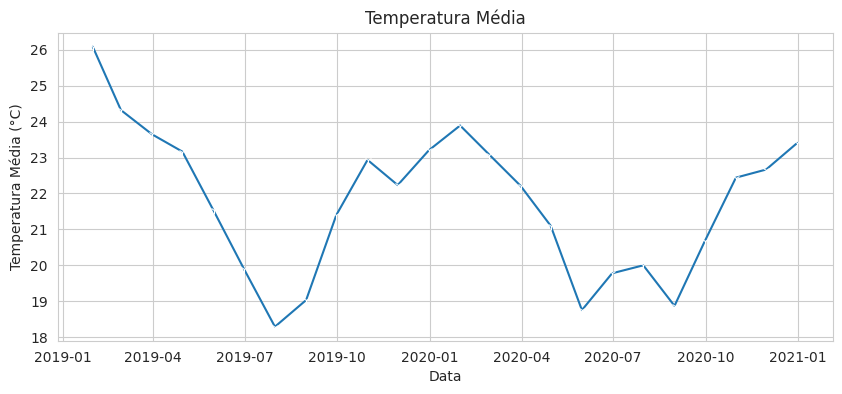

In [26]:
# resposta da questão 3.1.b

import matplotlib.pyplot as plt

with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=temperatura_reamostrada, x='referencia', y='temp-media', marker='1', palette='pastel')
  grafico.set(title='Temperatura Média', xlabel='Data', ylabel='Temperatura Média (°C)');
  grafico.figure.set_size_inches(10, 4)

 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **residencial**.

In [27]:
# resposta da questão 3.1.b

energia_reamostrada = energia_filtrada.resample(rule='M').mean()
print(energia_reamostrada.head())

            residencial  industrial  comercial
referencia                                    
2019-01-31    6389714.0   7545071.0  4370412.0
2019-02-28    6188834.0   7285407.0  4365504.0
2019-03-31    6072327.0   7556147.0  4303463.0
2019-04-30    5610278.0   7494816.0  4115920.0
2019-05-31    5785412.0   7597072.0  4141319.0


<ipython-input-27-8c736d112c2c>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  energia_reamostrada = energia_filtrada.resample(rule='M').mean()


In [28]:
energia_reamostrada.shape

(24, 3)

<ipython-input-29-0832cc18757f>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=energia_reamostrada, x='referencia', y='residencial', marker='1', palette='pastel')


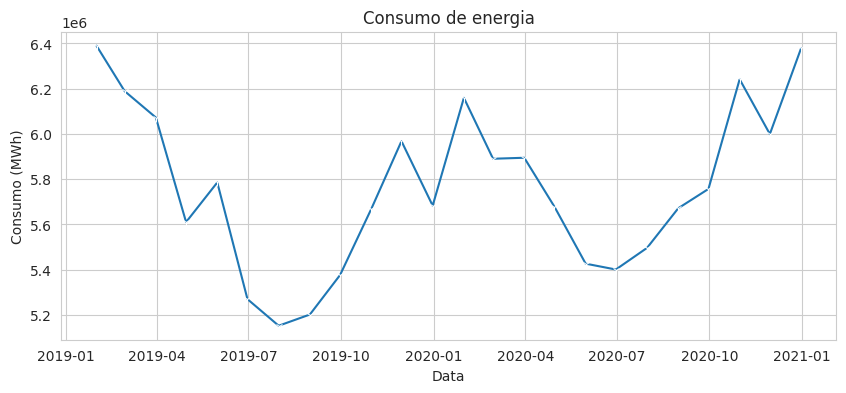

In [29]:
import matplotlib.pyplot as plt

with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia_reamostrada, x='referencia', y='residencial', marker='1', palette='pastel')
  grafico.set(title='Consumo de energia', xlabel='Data', ylabel='Consumo (MWh)');
  grafico.figure.set_size_inches(10, 4)

 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **residencial** e a **temperatura** média agregada `temp-media`.

In [30]:
# resposta da questão 3.1.c

correlacao = np.corrcoef(temperatura_reamostrada['temp-media'], energia_reamostrada['residencial'])[0, 1]
print(correlacao)

0.824271822739731


<ipython-input-31-8f428d5403d9>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=energia_reamostrada, x='referencia', y='residencial', marker='1', palette='pastel')


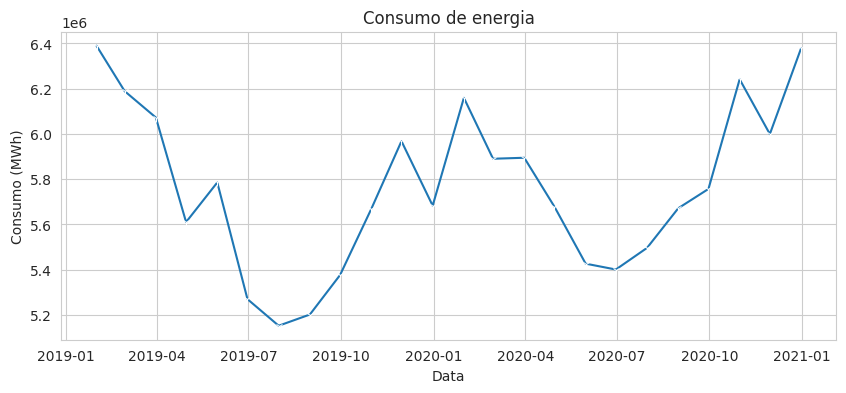

In [31]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia_reamostrada, x='referencia', y='residencial', marker='1', palette='pastel')
  grafico.set(title='Consumo de energia', xlabel='Data', ylabel='Consumo (MWh)');
  grafico.figure.set_size_inches(10, 4)

 - **d.** Baseado nas respostas dos items anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **residencial**?



**Resposta:**

O coeficiente está próximo de 1, isso indica que a temperatura tem uma forte relação com o consumo de energia elétrica residencial.

Em climas quentes, o uso de ar-condicionado, ventiladores e maior quantidade de banhos, pode aumentar o consumo de energia.

Verificamos que o consumo de energia cai abruptamente nos meses de Junho à Agosto, entendemos que sera devido ao período de inverno e começa aumentar novamente após Setembro, período da primavera.

### **3.2. Consumo comercial**

Repita o exercício 3.1. para dados de consumo de energia elétrica **comercial**.

In [32]:
correlacao = np.corrcoef(temperatura_reamostrada['temp-media'], energia_reamostrada['comercial'])[0, 1]
print(correlacao)

0.823502893910362


<ipython-input-33-a73d879bfd13>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=energia_reamostrada, x='referencia', y='comercial', marker='1', palette='pastel')


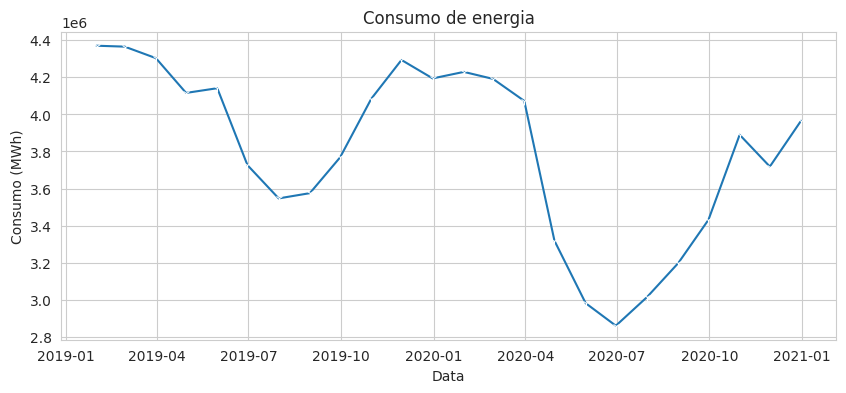

In [33]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia_reamostrada, x='referencia', y='comercial', marker='1', palette='pastel')
  grafico.set(title='Consumo de energia', xlabel='Data', ylabel='Consumo (MWh)');
  grafico.figure.set_size_inches(10, 4)

O coeficiente está próximo de 1, isso indica que a temperatura tem uma forte relação com o consumo de energia elétrica comercial.

Em climas quentes, o uso de ar-condicionado e ventiladores, pode aumentar o consumo de energia.

Houve uma grande queda no período de 04/2020 até 07/2020 e entendemos que seja devido ao período de pandemia, onde muitos estabelecimentos comerciais fecharam. Uma retomada começa a ocorrer a partir de 08/2020.

### **3.3. Consumo industrial**

Repita o exercício 3.1. para dados de consumo de energia elétrica **industrial**.

In [34]:
correlacao = np.corrcoef(temperatura_reamostrada['temp-media'], energia_reamostrada['industrial'])[0, 1]
print(correlacao)

0.287322967042256


<ipython-input-35-a74a031f970d>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=energia_reamostrada, x='referencia', y='industrial', marker='1', palette='pastel')


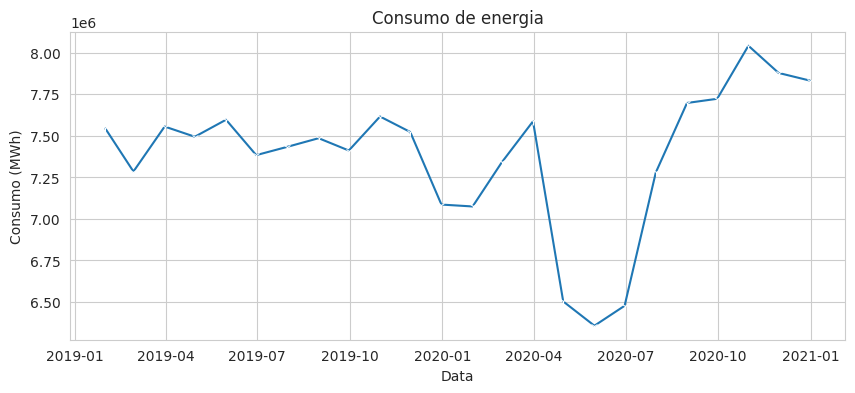

In [35]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia_reamostrada, x='referencia', y='industrial', marker='1', palette='pastel')
  grafico.set(title='Consumo de energia', xlabel='Data', ylabel='Consumo (MWh)');
  grafico.figure.set_size_inches(10, 4)

O coeficiente está próximo de 0, isso indica que a temperatura não tem uma forte relação com o consumo de energia elétrica industrial.

Isso porque normalmente industrias já possuem um sistema de refrigeração central ligado diariamente, independente do clima, como forma de manter o ambiente climatizado.

Houve uma grande queda no período de 04/2020 até 07/2020 e entendemos que seja devido ao período de pandemia, onde muitas industrias fecharam, diminuiram funcionários ou cortaram gastaos. Uma retomada começa a ocorrer a partir de 08/2020.

---